In [1]:
#Running only on columns with a correlation of .5 or higher from the Lauren_Cluster worksheet
#'GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score', 'Beer_Servings', 'Wine_Servings','HDI', 'Schooling'

In [2]:
#working from this walk through
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177816-understand-how-k-means-clustering-works

In [3]:
#Starting here:
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177851-carry-out-a-k-means-clustering

In [4]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 

#import the kmeans algorithm
from sklearn.cluster import KMeans

#import functions from the tutorial
from functions import *

In [48]:
#load the cleaned & scaled data
happy_df = pd.read_csv("Resources/Data/scaled_data.csv")
happy_data = happy_df[['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score', 'Beer_Servings', 'Wine_Servings', 'Schooling']]
happy_data.head()

GDP  Social_Support  Life_Expectancy (Happiness)  Freedom_Score  \
0  0.929138        0.979132                     0.936153       0.973512   
1  0.940905        0.980836                     0.942685       0.975842   
2  0.958889        0.967350                     0.964818       0.944962   
3  0.940779        1.000000                     0.950464       0.973224   
4  0.968310        0.977240                     0.953078       0.980259   

   Beer_Servings  Wine_Servings  Schooling  
0       0.699468       0.262162   0.833333  
1       0.595745       0.751351   0.941176  
2       0.492021       0.756757   0.784314  
3       0.619681       0.210811   0.931373  
4       0.449468       0.348649   0.867647

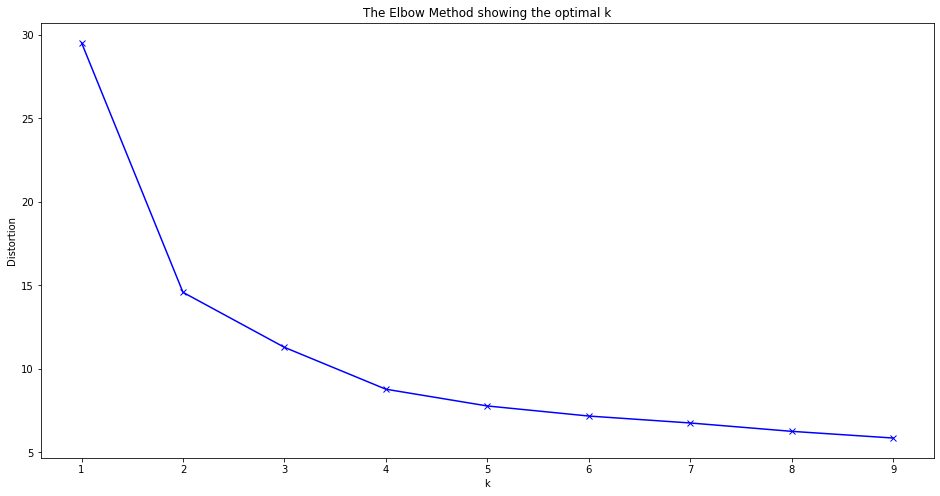

In [49]:
#Running elbow method on the limited data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(happy_data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [50]:
#Skipped the steps scaling & cleaning the data as we already performed this
#First using 2 clusters based on the elbow method done above. Will run 3 after.

#Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=2, n_init=10)

#Fit the data to the model
kmeans.fit(happy_data)

#Determine which clusters each data point belongs to:
clusters = kmeans.predict(happy_data)

In [51]:
#et's add a new column, cluster number to the original data so we can see what countries sit in what cluster:

#Add cluster number to the original data
happy_clustered = pd.DataFrame(happy_data, columns=happy_data.columns, index = happy_data.index)
happy_clustered['Happiness_Score'] = happy_df['Happiness_Score']
happy_clustered['cluster'] = clusters

happy_clustered.head()

GDP  Social_Support  Life_Expectancy (Happiness)  Freedom_Score  \
0  0.929138        0.979132                     0.936153       0.973512   
1  0.940905        0.980836                     0.942685       0.975842   
2  0.958889        0.967350                     0.964818       0.944962   
3  0.940779        1.000000                     0.950464       0.973224   
4  0.968310        0.977240                     0.953078       0.980259   

   Beer_Servings  Wine_Servings  Schooling  Happiness_Score  cluster  
0       0.699468       0.262162   0.833333         1.000000        0  
1       0.595745       0.751351   0.941176         0.979113        0  
2       0.492021       0.756757   0.784314         0.968138        0  
3       0.619681       0.210811   0.931373         0.961043        0  
4       0.449468       0.348649   0.867647         0.958930        0

In [52]:
# Moving to next step of the tutorial, "Analyze the Results of a K-means Clustering"
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177861-analyze-the-results-of-a-k-means-clustering

In [53]:
from sklearn.decomposition import PCA

#Create a PCA model to reduce our data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(happy_data)

#Transfer the scaled data to the new PCA space
happy_reduced = pca.transform(happy_data)

In [54]:
#Convert to a data frame
happy_reduced_df = pd.DataFrame(happy_reduced, index = happy_data.index, columns=['PC1', 'PC2'])
happy_reduced_df['cluster'] = clusters
happy_reduced_df.head()

PC1       PC2  cluster
0  0.877208 -0.115574        0
1  0.996151 -0.279499        0
2  0.926463 -0.234038        0
3  0.844678 -0.148371        0
4  0.804178 -0.187775        0

In [55]:
#centers giving problems atm so just striking them from the code for now
# centres_reduced = pca.transform(kmeans.cluster_centers_)

In [56]:
# display_factorial_planes(happy_data, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
# plt.scatter(centres_reduced[:,0], centres_reduced[:,1],
#            marker='x', s=169, linewidth=3,
#            color='r', zorder=10)

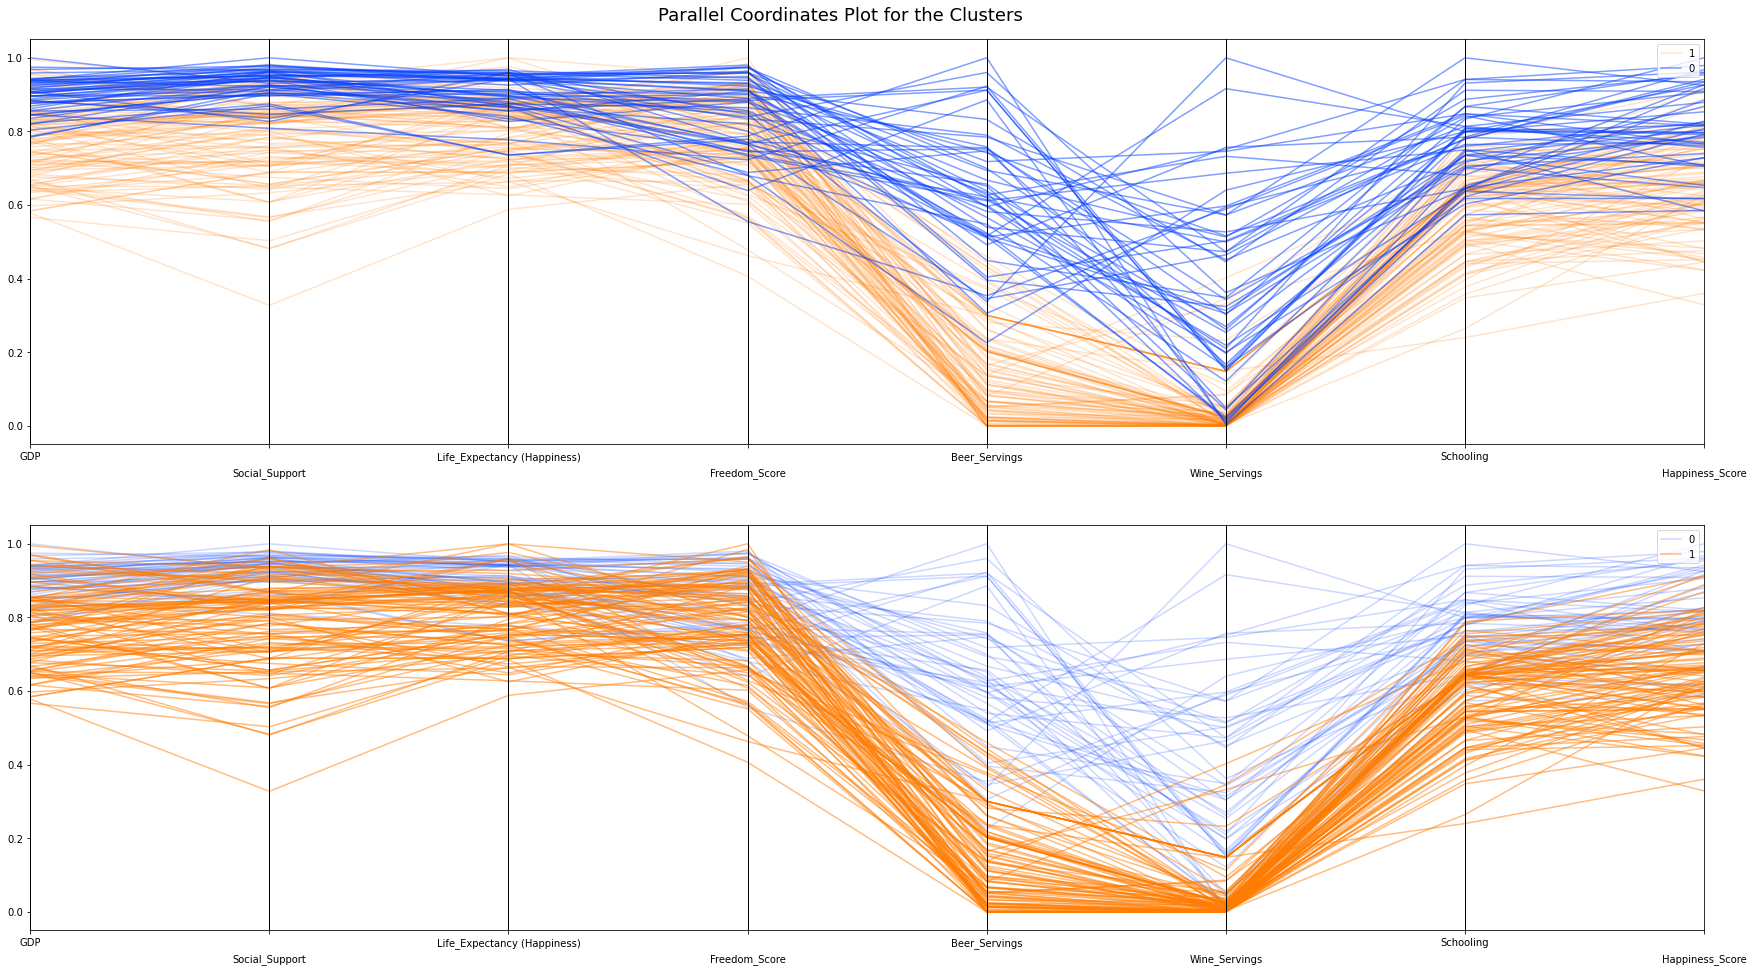

In [57]:
#display parallel coordinates plots, one for each cluster
display_parallel_coordinates(happy_clustered, 2)

In [58]:
#Group 0 appears to have more/higher quantities of the following:
##### Life_Expectancy(Happiness), Freedom_Score
#Group 0 has significantly lower social Support, HDI, and Schooling

#Group 1 appears to have more/higher quantities of the following:
####Social Support, Beer_Servings, Wine Servings, & HDI
#Group 1 doesn't seem to have many values that dip below anything of Group 0

In [59]:
#create a data frame containing our centroids
# centroids = pd.DataFrame(kmeans.cluster_centers_, columns=happy_data.columns)
# centroids['cluster'] = centroids.index

# display_parallel_coordinates_centroids(centroids,10)

In [60]:
#Now using 3 clusters.

#Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

#Fit the data to the model
kmeans.fit(happy_data)

#Determine which clusters each data point belongs to:
clusters = kmeans.predict(happy_data)

In [61]:
#et's add a new column, cluster number to the original data so we can see what countries sit in what cluster:

#Add cluster number to the original data
happy_clustered = pd.DataFrame(happy_data, columns=happy_data.columns, index = happy_data.index)
happy_clustered['Happiness_Score'] = happy_df['Happiness_Score']
happy_clustered['cluster'] = clusters

happy_clustered.head()

GDP  Social_Support  Life_Expectancy (Happiness)  Freedom_Score  \
0  0.929138        0.979132                     0.936153       0.973512   
1  0.940905        0.980836                     0.942685       0.975842   
2  0.958889        0.967350                     0.964818       0.944962   
3  0.940779        1.000000                     0.950464       0.973224   
4  0.968310        0.977240                     0.953078       0.980259   

   Beer_Servings  Wine_Servings  Schooling  Happiness_Score  cluster  
0       0.699468       0.262162   0.833333         1.000000        1  
1       0.595745       0.751351   0.941176         0.979113        1  
2       0.492021       0.756757   0.784314         0.968138        1  
3       0.619681       0.210811   0.931373         0.961043        1  
4       0.449468       0.348649   0.867647         0.958930        1

In [62]:
from sklearn.decomposition import PCA

#Create a PCA model to reduce our data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(happy_data)

#Transfer the scaled data to the new PCA space
happy_reduced = pca.transform(happy_data)

In [63]:
#Convert to a data frame
happy_reduced_df = pd.DataFrame(happy_reduced, index = happy_data.index, columns=['PC1', 'PC2'])

happy_reduced_df['cluster'] = clusters
happy_reduced_df.head()

PC1       PC2  cluster
0 -0.108662  0.539783        1
1 -0.126560  0.749978        1
2 -0.106000  0.637507        1
3 -0.108871  0.483235        1
4 -0.097154  0.421707        1

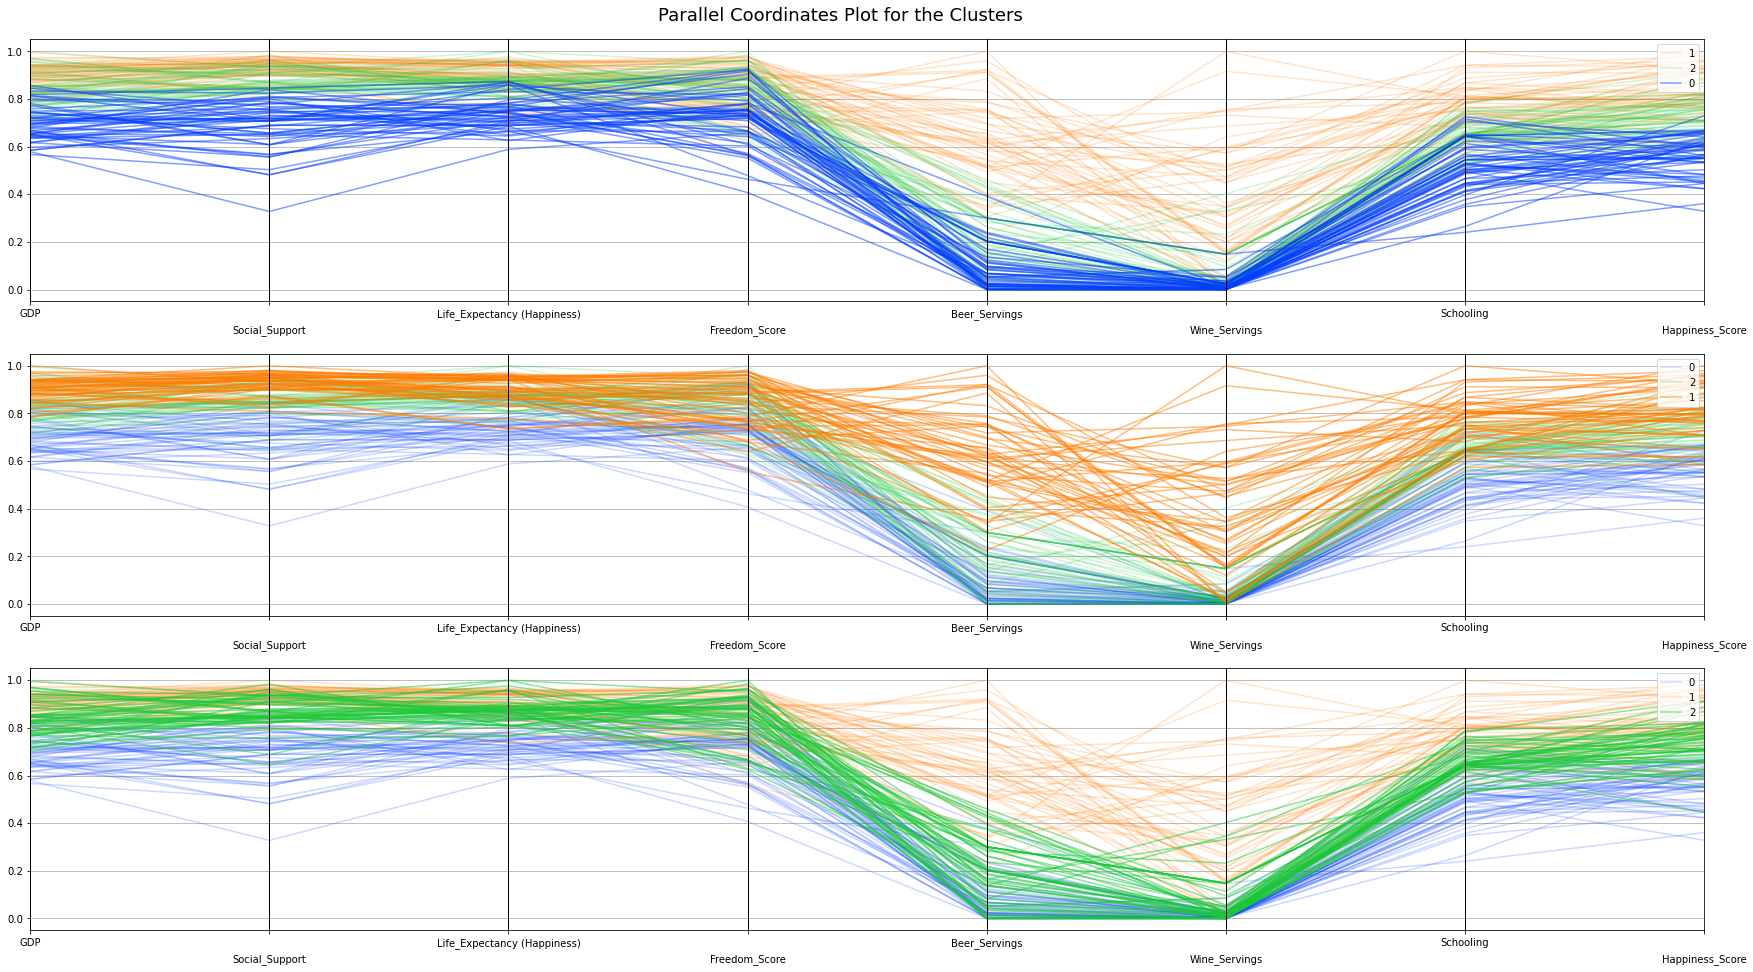

In [64]:
#display parallel coordinates plots, one for each cluster
display_parallel_coordinates(happy_clustered, 3)

In [22]:
#Initial Analysis:
#Cluster 0 (blue):
## High in: freedom_score
## Lowest in: social_support, life_expectancy(happiness), freedom_score, HDI, Schooling, GDP

#Cluster 1 (orange):
## High in: social_support, beer_servings, wine_servings, HDI, schooling
## Lowest in: Nothing catches my eye initially

#Cluster 2 (green)
## High in: GDP, life_expectancy(happiness), freedom_score, HDI is at least higher than cluster 0
## Lowest in: beer servings, wine servings

In [23]:
#Running on columns with high negative correlation

# 'Adult_Mortality', 'Corruption_Score', 'HIV/AIDS', 'infantdeaths', 
# 'thinness1-19years', 'thinness5-9years','Measles','Generosity'

In [24]:
#load the cleaned & scaled data
bad_data = happy_df[['Adult_Mortality', 'Corruption_Score', 'HIV/AIDS', 'infantdeaths', 
                     'thinness1-19years', 'thinness5-9years','Measles','Generosity']]
bad_data.head()

Adult_Mortality  Corruption_Score  HIV/AIDS  infantdeaths  \
0         0.157025          0.208901  0.010753           0.0   
1         0.146694          0.180090  0.010753           0.0   
2         0.101240          0.324640  0.010753           0.0   
3         0.101240          0.760711  0.010753           0.0   
4         0.121901          0.281341  0.010753           0.0   

   thinness1-19years  thinness5-9years   Measles  Generosity  
0           0.033708          0.029304  0.000022   -0.106092  
1           0.041199          0.032967  0.000100    0.118077  
2           0.014981          0.010989  0.000387    0.188903  
3           0.037453          0.032967  0.000000    0.440450  
4           0.029963          0.025641  0.000155    0.239952

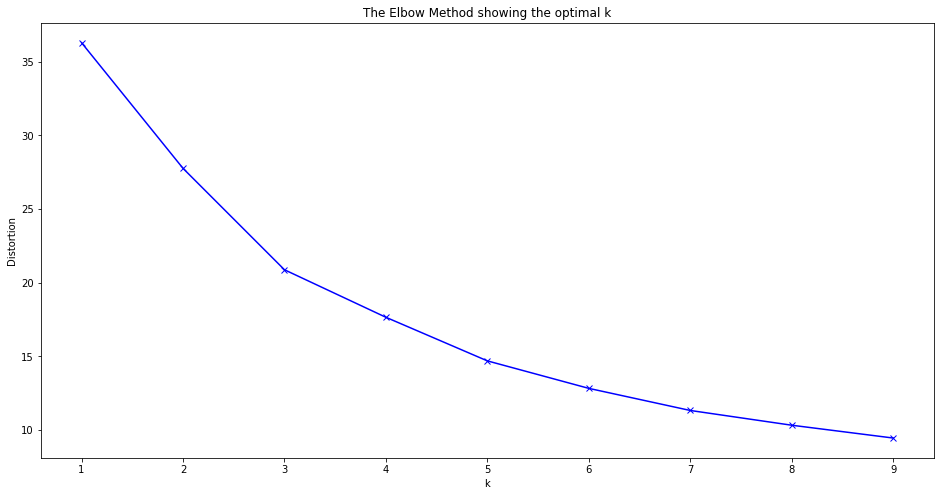

In [25]:
#Running elbow method on the limited data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(bad_data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [26]:
#Skipped the steps scaling & cleaning the data as we already performed this
#Using 3 clusters per the elbow method above

#Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

#Fit the data to the model
kmeans.fit(bad_data)

#Determine which clusters each data point belongs to:
clusters = kmeans.predict(bad_data)

In [27]:
#et's add a new column, cluster number to the original data so we can see what countries sit in what cluster:

#Add cluster number to the original data
bad_clustered = pd.DataFrame(bad_data, columns=bad_data.columns, index = bad_data.index)
bad_clustered['Happiness_Score'] = happy_df['Happiness_Score']
bad_clustered['cluster'] = clusters

bad_clustered.head()

Adult_Mortality  Corruption_Score  HIV/AIDS  infantdeaths  \
0         0.157025          0.208901  0.010753           0.0   
1         0.146694          0.180090  0.010753           0.0   
2         0.101240          0.324640  0.010753           0.0   
3         0.101240          0.760711  0.010753           0.0   
4         0.121901          0.281341  0.010753           0.0   

   thinness1-19years  thinness5-9years   Measles  Generosity  Happiness_Score  \
0           0.033708          0.029304  0.000022   -0.106092         1.000000   
1           0.041199          0.032967  0.000100    0.118077         0.979113   
2           0.014981          0.010989  0.000387    0.188903         0.968138   
3           0.037453          0.032967  0.000000    0.440450         0.961043   
4           0.029963          0.025641  0.000155    0.239952         0.958930   

   cluster  
0        2  
1        2  
2        2  
3        2  
4        2

In [28]:
from sklearn.decomposition import PCA

#Create a PCA model to reduce our data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(bad_data)

#Transfer the scaled data to the new PCA space
bad_reduced = pca.transform(bad_data)

In [29]:
#Convert to a data frame
bad_reduced_df = pd.DataFrame(bad_reduced, index = bad_data.index, columns=['PC1', 'PC2'])
bad_reduced_df['cluster'] = clusters
bad_reduced_df.head()

PC1       PC2  cluster
0  1.171544 -0.515688        2
1  1.228236 -0.515084        2
2  1.228927 -0.510521        2
3  1.246810 -0.356803        2
4  1.246394 -0.496348        2

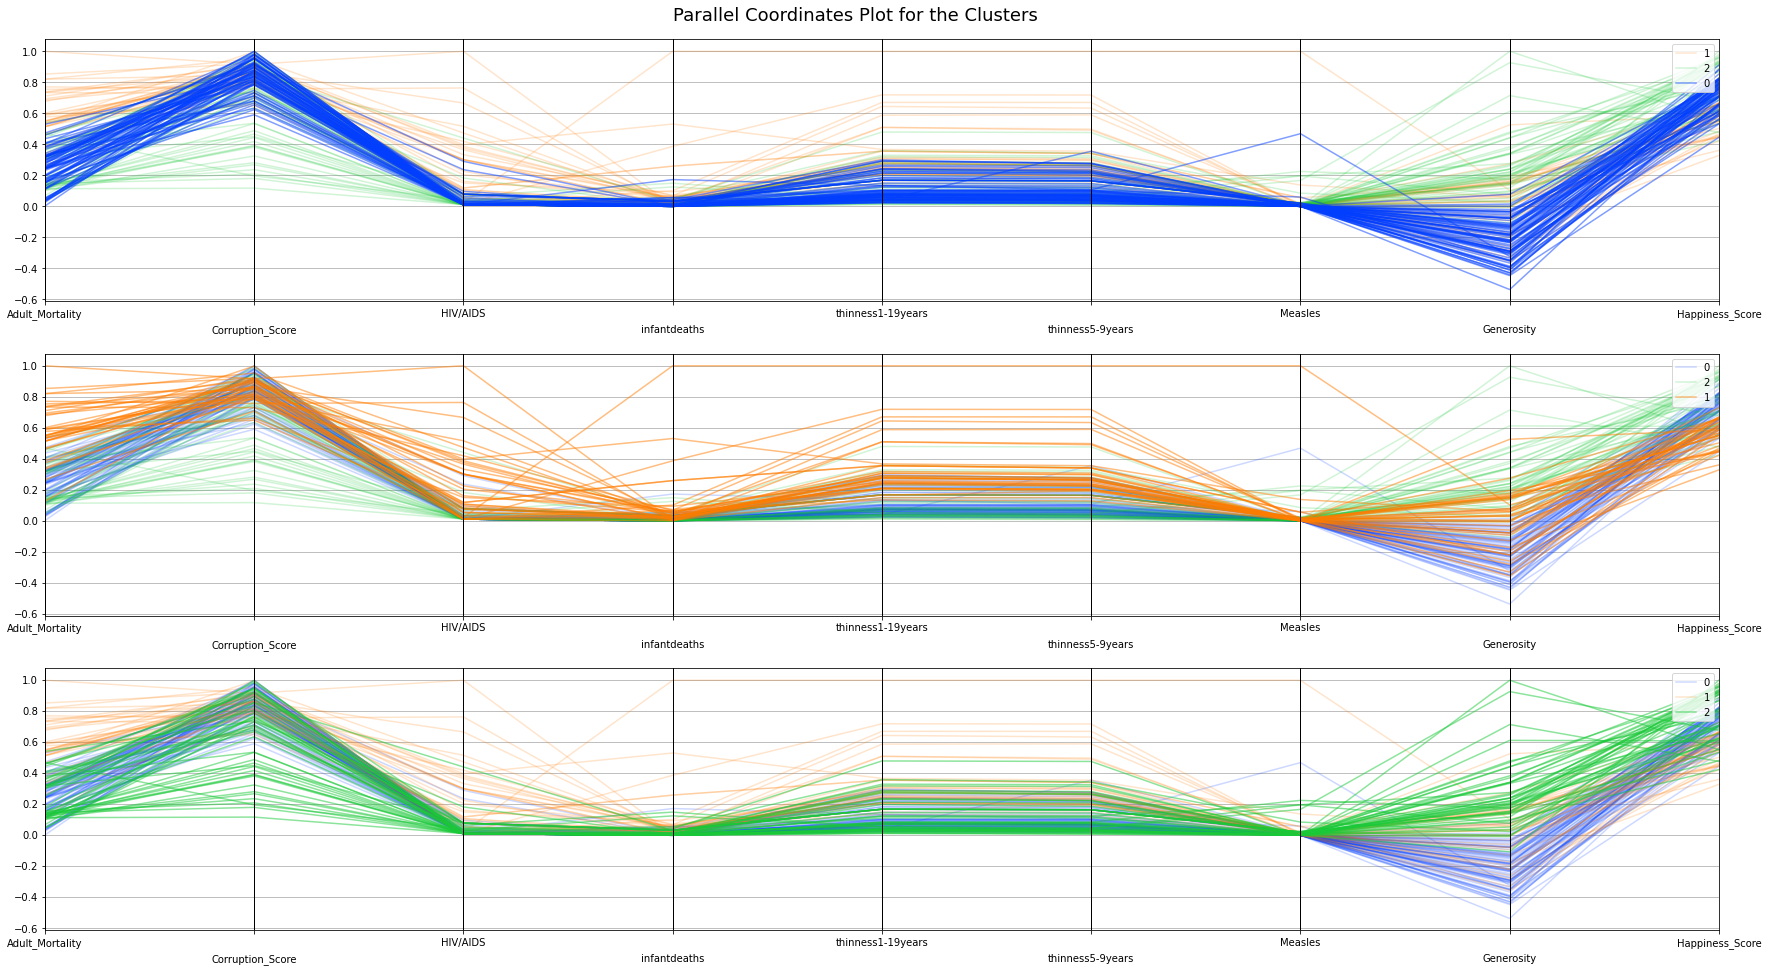

In [30]:
#display parallel coordinates plots, one for each cluster
display_parallel_coordinates(bad_clustered, 3)

In [31]:
#Looking at things with high negative & positive correlations
# 'Adult_Mortality', 'Corruption_Score', 'HIV/AIDS', 'infantdeaths', 
# 'thinness1-19years', 'Measles','Generosity',
# 'GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
# 'Beer_Servings', 'Wine_Servings', 'Schooling'

In [32]:
#load the cleaned & scaled data
full_data = happy_df[['Adult_Mortality', 'Corruption_Score', 'HIV/AIDS', 'infantdeaths', 
'thinness1-19years', 'Measles','Generosity',
'GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
'Beer_Servings', 'Wine_Servings', 'Schooling']]
full_data.head()

Adult_Mortality  Corruption_Score  HIV/AIDS  infantdeaths  \
0         0.157025          0.208901  0.010753           0.0   
1         0.146694          0.180090  0.010753           0.0   
2         0.101240          0.324640  0.010753           0.0   
3         0.101240          0.760711  0.010753           0.0   
4         0.121901          0.281341  0.010753           0.0   

   thinness1-19years   Measles  Generosity       GDP  Social_Support  \
0           0.033708  0.000022   -0.106092  0.929138        0.979132   
1           0.041199  0.000100    0.118077  0.940905        0.980836   
2           0.014981  0.000387    0.188903  0.958889        0.967350   
3           0.037453  0.000000    0.440450  0.940779        1.000000   
4           0.029963  0.000155    0.239952  0.968310        0.977240   

   Life_Expectancy (Happiness)  Freedom_Score  Beer_Servings  Wine_Servings  \
0                     0.936153       0.973512       0.699468       0.262162   
1                     0.942685       0.975842       0.595745       0.751351   
2                     0.964818       0.944962       0.492021       0.756757   
3                     0.950464       0.973224       0.619681       0.210811   
4                     0.953078       0.980259       0.449468       0.348649   

   Schooling  
0   0.833333  
1   0.941176  
2   0.784314  
3   0.931373  
4   0.867647

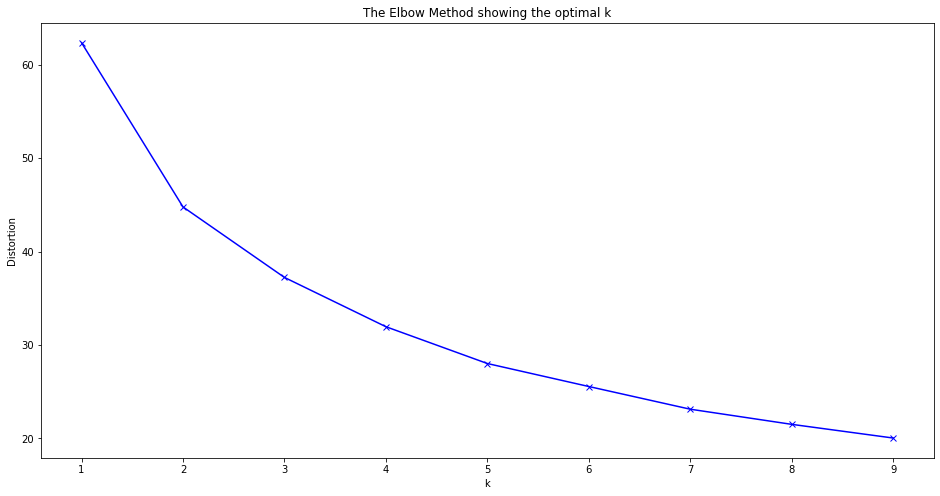

In [33]:
#Running elbow method on the limited data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(full_data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [34]:
#Skipped the steps scaling & cleaning the data as we already performed this
#Using 3 clusters per the elbow method above

#Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=2, n_init=10)

#Fit the data to the model
kmeans.fit(full_data)

#Determine which clusters each data point belongs to:
clusters = kmeans.predict(full_data)

In [40]:
#Let's add a new column, cluster number to the original data so we can see what countries sit in what cluster:

#Add cluster number to the original data
full_clustered = pd.DataFrame(full_data, columns=full_data.columns, index = full_data.index)
full_clustered['Happiness_Score'] = happy_df['Happiness_Score']
full_clustered['cluster'] = clusters
full_clustered.head()

Adult_Mortality  Corruption_Score  HIV/AIDS  infantdeaths  \
0         0.157025          0.208901  0.010753           0.0   
1         0.146694          0.180090  0.010753           0.0   
2         0.101240          0.324640  0.010753           0.0   
3         0.101240          0.760711  0.010753           0.0   
4         0.121901          0.281341  0.010753           0.0   

   thinness1-19years   Measles  Generosity       GDP  Social_Support  \
0           0.033708  0.000022   -0.106092  0.929138        0.979132   
1           0.041199  0.000100    0.118077  0.940905        0.980836   
2           0.014981  0.000387    0.188903  0.958889        0.967350   
3           0.037453  0.000000    0.440450  0.940779        1.000000   
4           0.029963  0.000155    0.239952  0.968310        0.977240   

   Life_Expectancy (Happiness)  Freedom_Score  Beer_Servings  Wine_Servings  \
0                     0.936153       0.973512       0.699468       0.262162   
1                     0.942685       0.975842       0.595745       0.751351   
2                     0.964818       0.944962       0.492021       0.756757   
3                     0.950464       0.973224       0.619681       0.210811   
4                     0.953078       0.980259       0.449468       0.348649   

   Schooling  cluster  Happiness_Score  
0   0.833333        0         1.000000  
1   0.941176        0         0.979113  
2   0.784314        0         0.968138  
3   0.931373        0         0.961043  
4   0.867647        0         0.958930

In [41]:
from sklearn.decomposition import PCA

#Create a PCA model to reduce our data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(full_data)

#Transfer the scaled data to the new PCA space
full_reduced = pca.transform(full_data)

In [42]:
#Convert to a data frame
full_reduced_df = pd.DataFrame(full_reduced, index = full_data.index, columns=['PC1', 'PC2'])
full_reduced_df['cluster'] = clusters
full_reduced_df.head()

PC1       PC2  cluster
0  0.871812  0.255061        0
1  0.953314  0.532714        0
2  0.879376  0.541621        0
3  0.741845  0.496919        0
4  0.766642  0.549363        0

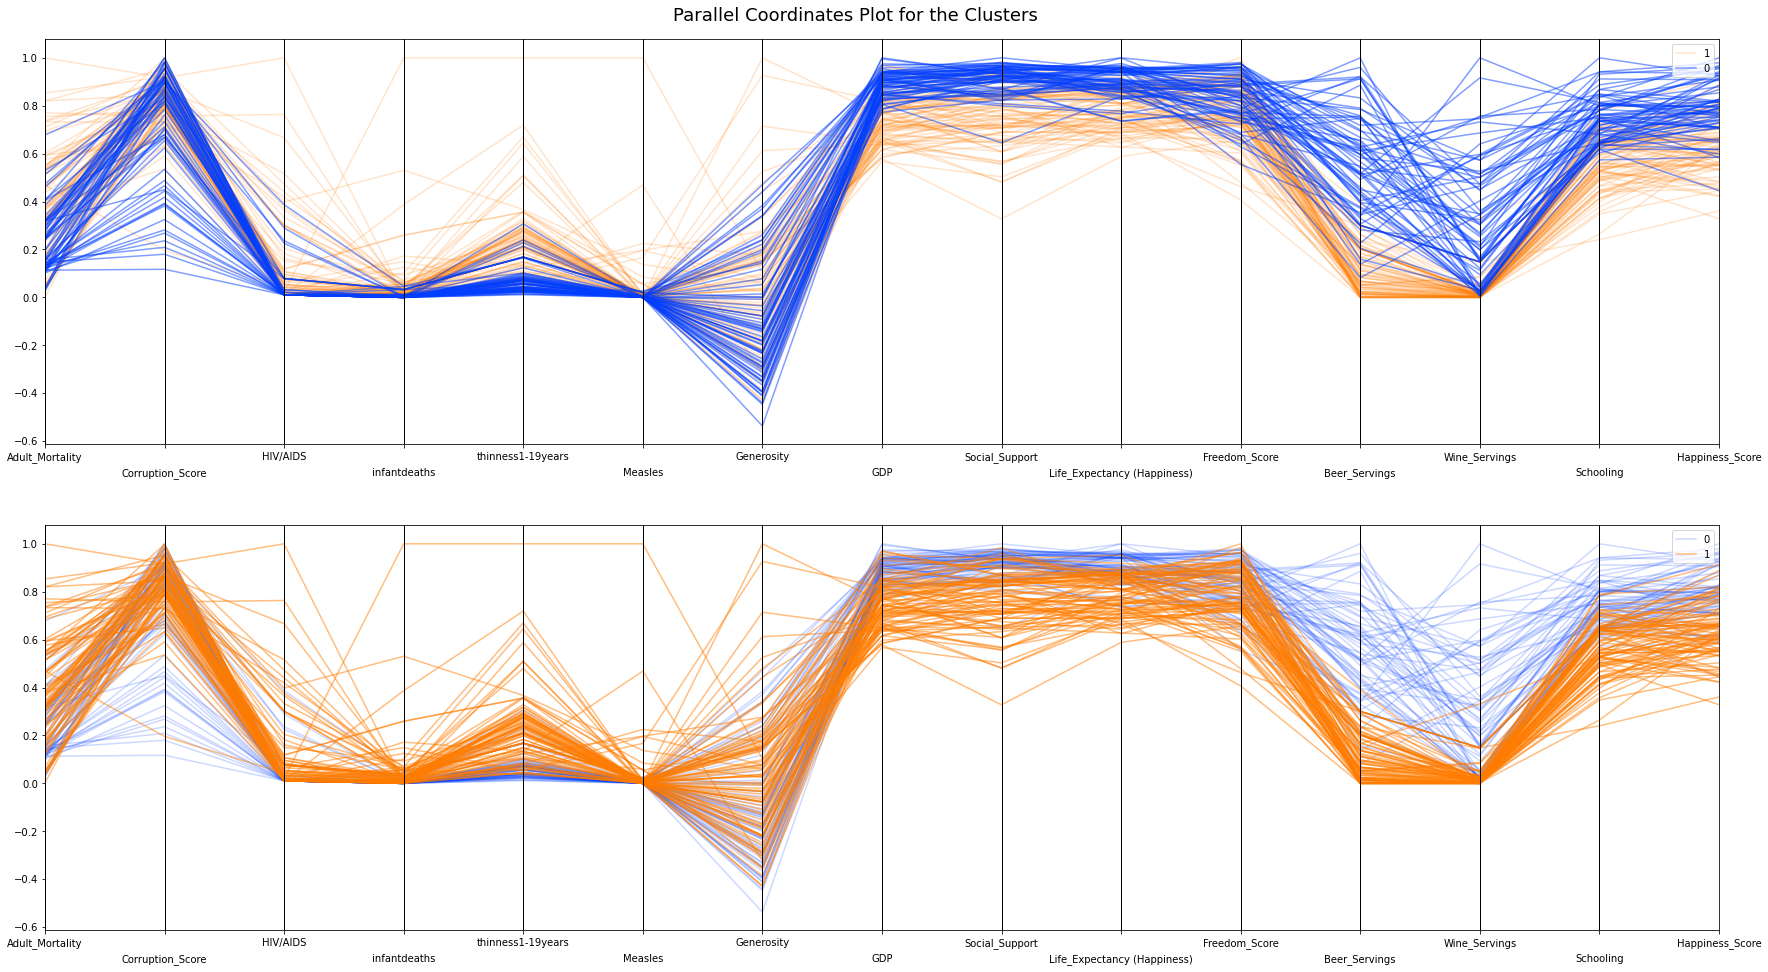

In [43]:
#display parallel coordinates plots, one for each cluster
display_parallel_coordinates(full_clustered, 2)

In [39]:
#Initial Analysis:
#Cluster 0 (blue):
## High in: corruption score, gdp, social support, life expectancy, freedom score, beer, wine, schooling
## Low in: adult mortality, corruption score, hiv/aids, thinness, generosity, 

#Cluster 1 (orange):
## High in: adult mortality, corruption, hiv aids, infant deaths, thinness, measles, generosity, 
## Low  in: gdp, social support, life expectancy, freedom score, beer, wine, schooling
